In [254]:
#loading packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp
import seaborn as sns

In [255]:
#import data sets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [256]:
df_ws.rename(columns={'Goals/90min': 'GpG'}, inplace=True)
df_ws.rename(columns={'DrB (off)': 'DrBoff'}, inplace=True)

In [257]:
df_ws.head()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [258]:
df_ws = df_ws.dropna()

In [259]:
df_ws.describe()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536,...,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536
unique,12536,259,119,209,78,56,546,249,55,52,...,23,45,41,699,35,127,12,33,11,38
top,Edgar Barreto,Undefined,Undefined,Undefined,0.0,Undefined,Undefined,0.00,Undefined,Undefined,...,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0,Undefined,Undefined,Undefined
freq,1,5617,5617,5617,6406,5617,5617,5612,5618,5618,...,5619,5619,5616,5616,5616,5616,5721,5619,5619,5619


In [260]:
df_ws = df_ws.dropna(how='any')

In [261]:
df_ws = df_ws[df_ws.Rating.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.GpG.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.Tackles.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.DrBoff.str.contains("Undefined") == False]
df_ws = df_ws[df_ws.OutOfBox.str.contains("Undefined") == False]
#df_ws['Player Name'] = df_ws['Player Name'].str.replace("'", '')

In [262]:
df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea' ]] = df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea']].apply(pd.to_numeric)
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)


In [263]:
df_ws.describe()

,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,...,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,0.438923,0.090391,0.366647,0.025109,0.781247,75.179931,6.633448,1.148068,0.887050,0.929127,...,0.128100,0.707293,0.579091,27.197858,0.275141,1.988222,0.026986,0.334409,0.049342,0.400955
std,5.279474,1.095836,2.861676,0.617253,0.781985,12.830127,0.390793,0.899486,0.844842,0.645789,...,0.245339,0.677156,0.580674,15.335640,0.440288,2.094405,0.075585,0.425575,0.103117,0.486024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.610000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.200000,70.300000,6.360000,0.400000,0.200000,0.500000,...,0.000000,0.100000,0.100000,15.500000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.150000,0.000000,0.600000,77.600000,6.630000,1.000000,0.700000,0.900000,...,0.000000,0.500000,0.400000,26.100000,0.100000,1.400000,0.000000,0.200000,0.000000,0.300000
75%,0.210000,0.110000,0.310000,0.000000,1.100000,82.900000,6.900000,1.700000,1.400000,1.300000,...,0.200000,1.000000,0.900000,37.100000,0.400000,2.800000,0.000000,0.500000,0.100000,0.600000
max,270.000000,90.000000,90.000000,45.000000,7.000000,100.000000,8.990000,8.000000,8.000000,5.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.300000,1.500000,3.700000,1.000000,4.800000


In [264]:
df_tm = df_tm.rename(columns={'Current.market.value': 'current_market_value', 'Current.club': 'current_club','Highest.market.value': 'highest_market_value', 'Place.of.birth': 'place_of_birth', 'Date.of.birth': 'date_of_birth', 'Country.of.birth': 'country_of_birth','Continent.specific': 'continent_specific'})

In [265]:
df_tmh = df_tm.sort_values('highest_market_value', ascending=False)
df_tmh = df_tmh[df_tmh['highest_market_value'] >= 1000000]

In [266]:
df_tmh.loc[df_tm['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_tmh.loc[df_tm['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_tmh.loc[df_tm['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [267]:
#there are definitely issues here bc of different name for same person. need to use solution for 98% match or use dob 
#scraped from transfermarkt
df = pd.merge(left=df_tmh, right=df_ws, left_on='Name', right_on='Player Name')

In [268]:
df['west_african'] = np.where(df['continent_specific']=="West Africa", 'yes', 'no')

In [269]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,4004.000000,123.000000,4.012000e+03,4.012000e+03,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,...,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000
mean,1.816673,9.869919,4.872284e+06,7.070837e+06,0.392450,0.085344,0.330785,0.024731,0.899900,76.667846,...,0.148255,0.755932,0.665354,30.242049,0.310793,2.155359,0.034521,0.383425,0.057478,0.463734
std,0.066648,1.188809,8.381368e+06,9.815630e+06,5.013613,0.161533,2.310567,0.719607,0.851614,11.474218,...,0.264522,0.695035,0.622748,15.740096,0.477732,2.106387,0.084011,0.460190,0.108301,0.526172
min,1.600000,7.500000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.000000e+06,1.975000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.100000,...,0.000000,0.200000,0.200000,18.400000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.820000,10.000000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.700000,...,0.000000,0.600000,0.500000,29.000000,0.100000,1.600000,0.000000,0.300000,0.000000,0.300000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.260000,0.130000,0.320000,0.000000,1.300000,83.900000,...,0.200000,1.100000,1.000000,40.500000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000
max,2.030000,13.000000,1.200000e+08,1.200000e+08,270.000000,2.900000,90.000000,45.000000,7.000000,100.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.000000,1.300000,3.700000,1.000000,4.800000


In [270]:
df.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african
0,Cristiano Ronaldo,"Feb 5, 1985","Funchal, Portugal",32,1.85,NaN,Portugal,Striker,both,Real Madrid,...,0.6,1.6,28.0,0.3,0.5,0.2,1.6,0.7,4.8,no
1,Lionel Messi,"Jun 24, 1987","Rosario, Argentina",30,1.70,8.5,"Argentina, Spain",Striker,left,FC Barcelona,...,3.5,2.2,53.3,0.4,2.4,0.4,2.7,0.4,2.9,no
2,Neymar,"Feb 5, 1992","Mogi das Cruzes, Brazil",25,1.75,NaN,Brazil,Striker,both,Paris Saint-Germain,...,3.5,3.8,61.2,1.2,2.1,1.3,1.5,0.1,2.0,no
3,Luis Suarez,"Jan 24, 1987","Salto, Uruguay",30,1.82,NaN,Uruguay,Striker,right,FC Barcelona,...,1.5,0.9,31.1,0.0,1.3,0.2,0.9,0.5,2.6,no
4,Gareth Bale,"Jul 16, 1989","Cardiff, Wales",28,1.83,NaN,Wales,Striker,left,Real Madrid,...,0.6,2.7,27.6,0.7,1.6,0.0,0.3,0.3,2.3,no


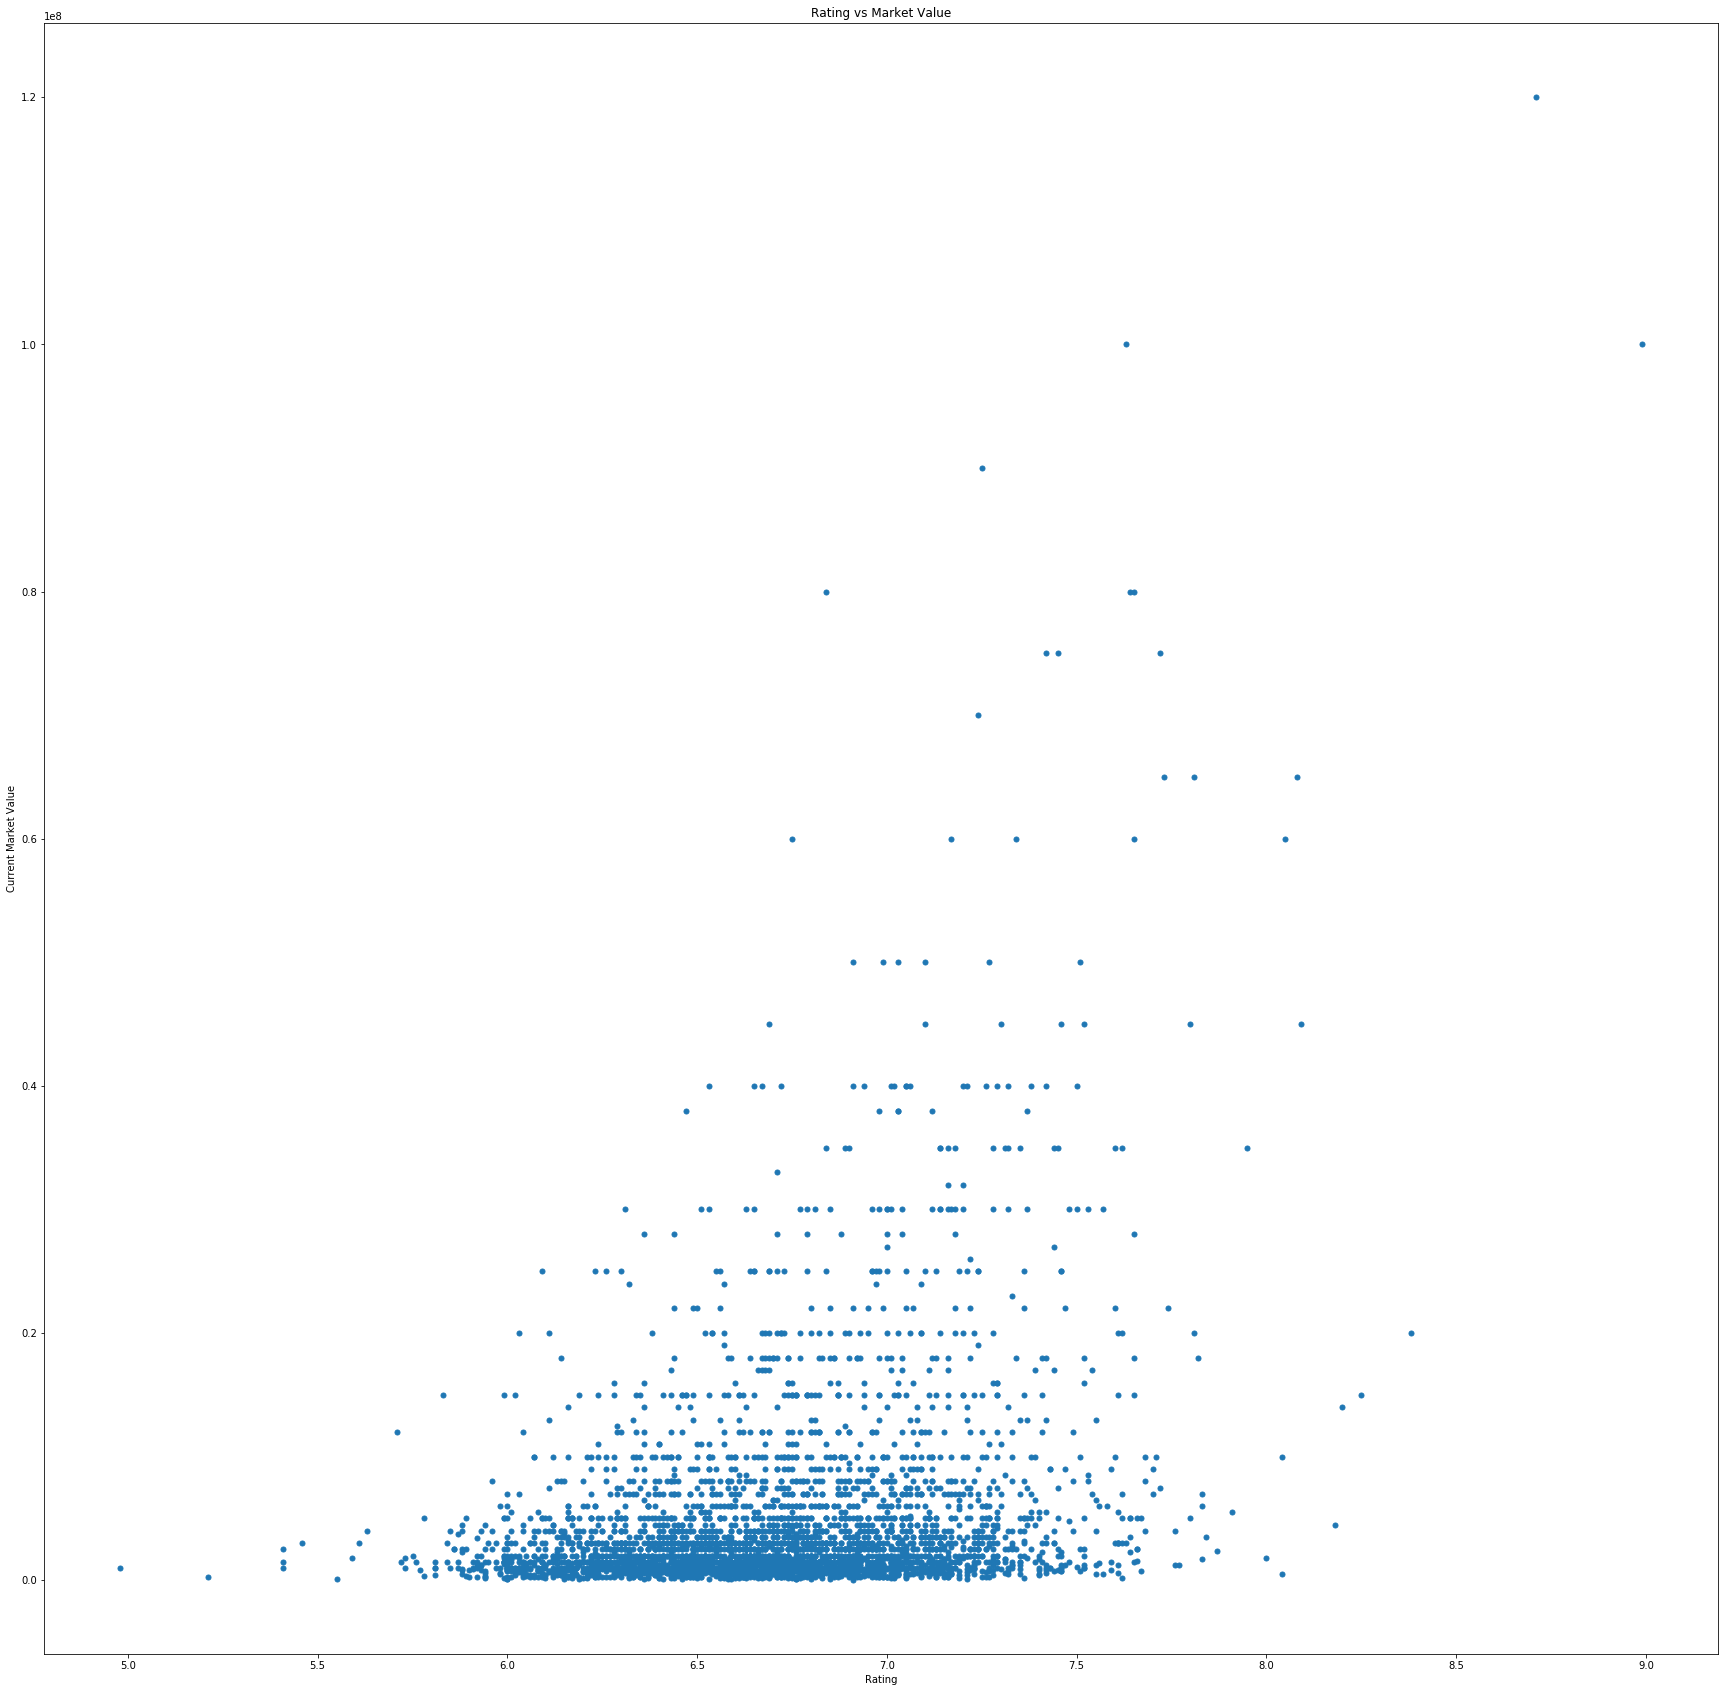

In [271]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value')
plt.show()

In [272]:
df['Rating'].corr(df['current_market_value'])

0.29761334940072981

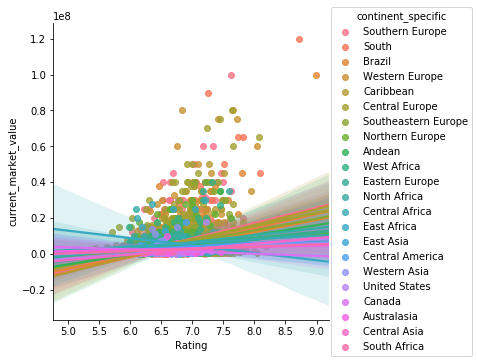

In [273]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="continent_specific", data=df)

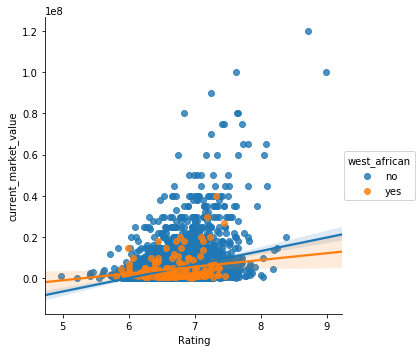

In [299]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df)

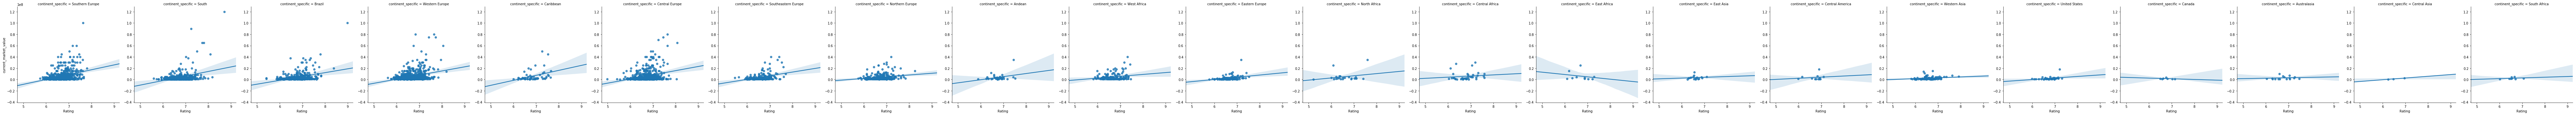

In [274]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", data=df)

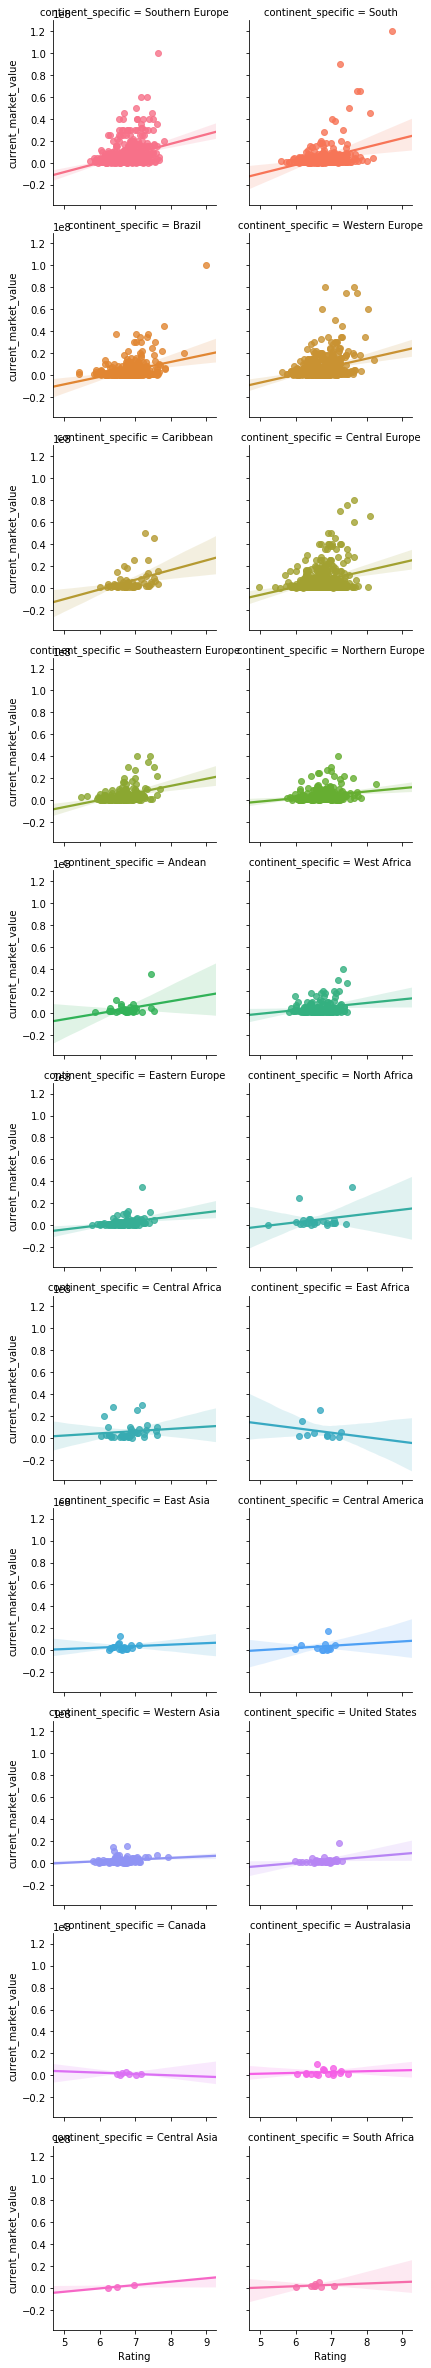

In [275]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", hue="continent_specific",
               data=df, col_wrap=2, size=3)

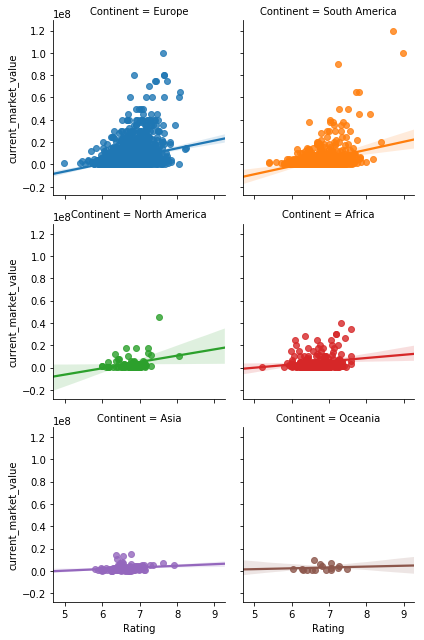

In [277]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Continent", hue="Continent",
               data=df, col_wrap=2, size=3)

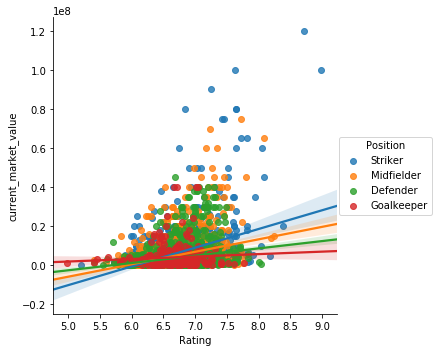

In [278]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df)

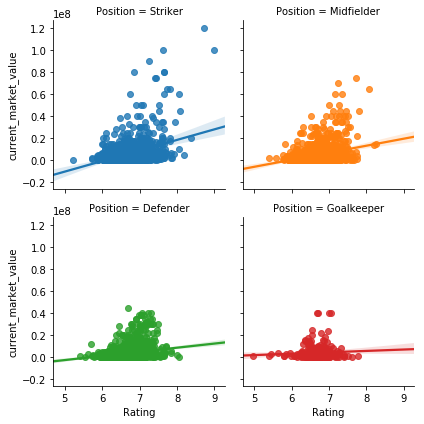

In [279]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Position", hue="Position",
               data=df, col_wrap=2, size=3)

In [280]:
df.dtypes

Name                     object
date_of_birth            object
place_of_birth           object
Age                      object
Height                  float64
Shoe.size               float64
Nationality              object
Position                 object
Foot                     object
current_club             object
current_market_value    float64
highest_market_value    float64
City.of.birth            object
country_of_birth         object
Birth.country.code       object
Continent                object
continent_specific       object
Player Name              object
GpG                     float64
Assists/90min           float64
Yel/90min               float64
Red/90min               float64
SpG                     float64
PS%                     float64
Rating                  float64
Tackles                 float64
Inter                   float64
Fouls (def)             float64
Offsides                float64
Clear                   float64
DrB (def)               float64
Blocks  

In [281]:
#df_wa = df[df['place_of_birth'].isin(["Senegal", "Cote d'Ivoire", "Cape Verde", "Cameroon", "Democratic Republic of Congo", "Nigeria", "Benin", "Equatorial Guinea", "Burkina Faso", "Ghana", "Gambia"])]
#df_test = df[df['place_of_birth'].isin(["Brazil", "Colombia"])]


In [282]:
wa_country_list = ["Senegal", "Cote d'Ivoire", "Cape Verde", "Cameroon", "Democratic Republic of Congo", "Nigeria", "Benin", "Equatorial Guinea", "Burkina Faso", "Ghana", "Gambia"]
df_wa = df[df.country_of_birth.isin(wa_country_list)]

In [283]:
df_wa.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,107.000000,0.0,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,1.810467,NaN,4.350935e+06,6.352336e+06,0.569252,0.059907,0.304953,0.011869,1.075701,76.800935,...,0.293458,0.984112,0.565421,27.328037,0.142991,1.795327,0.026168,0.353271,0.090654,0.629907
std,0.065060,NaN,5.821917e+06,6.698632e+06,2.106172,0.109488,0.662940,0.042540,0.892827,9.249299,...,0.392205,0.823723,0.474859,14.673592,0.237166,2.030633,0.066356,0.323693,0.132133,0.672255
min,1.680000,NaN,4.000000e+05,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.760000,NaN,1.000000e+06,2.000000e+06,0.000000,0.000000,0.055000,0.000000,0.400000,71.750000,...,0.000000,0.300000,0.200000,17.050000,0.000000,0.350000,0.000000,0.100000,0.000000,0.100000
50%,1.800000,NaN,2.000000e+06,4.000000e+06,0.130000,0.000000,0.170000,0.000000,0.800000,77.800000,...,0.100000,0.800000,0.500000,27.400000,0.000000,1.000000,0.000000,0.300000,0.000000,0.400000
75%,1.850000,NaN,5.000000e+06,7.750000e+06,0.435000,0.095000,0.360000,0.000000,1.700000,83.150000,...,0.500000,1.400000,0.850000,34.650000,0.200000,2.700000,0.000000,0.600000,0.100000,1.000000
max,1.980000,NaN,4.000000e+07,4.000000e+07,19.290000,0.520000,6.430000,0.310000,3.900000,95.400000,...,2.000000,3.400000,2.200000,81.400000,1.500000,11.000000,0.300000,1.500000,0.500000,3.000000


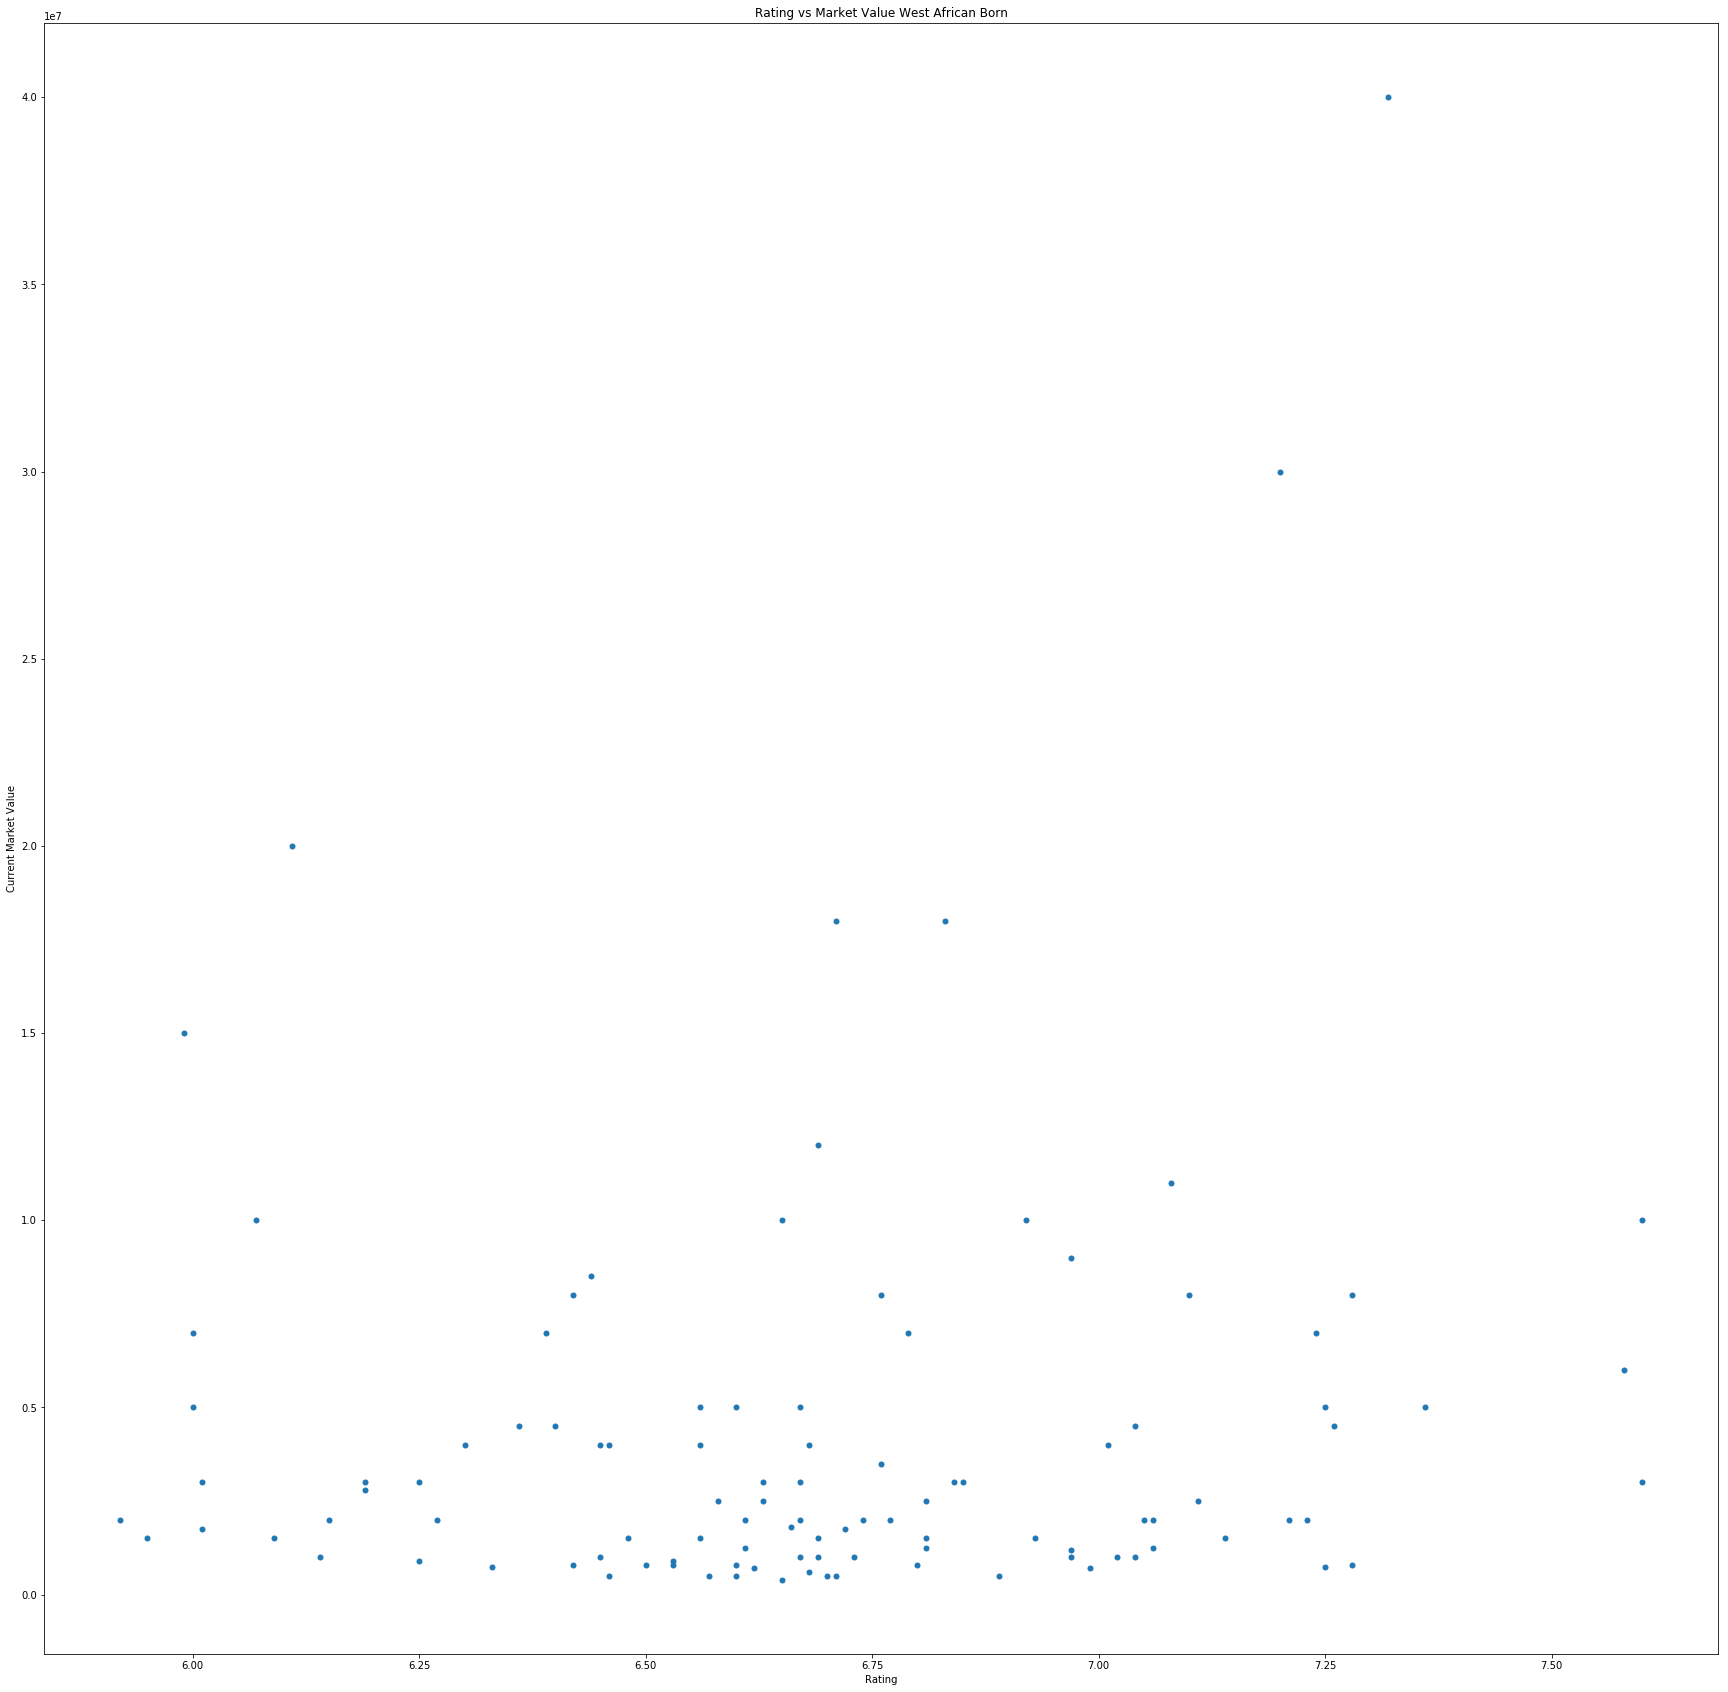

In [284]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_wa, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value West African Born')
plt.show()

In [285]:
df_wa['Rating'].corr(df_wa['current_market_value'])

0.14374750520614724

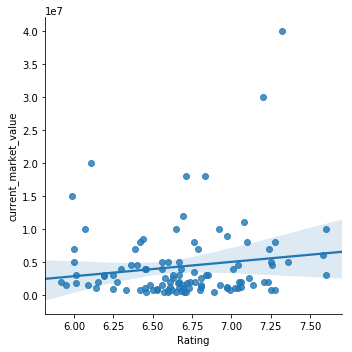

In [286]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_wa)

In [287]:
striker = ['Striker']
df_st = df[df.Position.isin(striker)]

In [288]:
df_st.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african
0,Cristiano Ronaldo,"Feb 5, 1985","Funchal, Portugal",32,1.85,NaN,Portugal,Striker,both,Real Madrid,...,0.6,1.6,28.0,0.3,0.5,0.2,1.6,0.7,4.8,no
1,Lionel Messi,"Jun 24, 1987","Rosario, Argentina",30,1.70,8.5,"Argentina, Spain",Striker,left,FC Barcelona,...,3.5,2.2,53.3,0.4,2.4,0.4,2.7,0.4,2.9,no
2,Neymar,"Feb 5, 1992","Mogi das Cruzes, Brazil",25,1.75,NaN,Brazil,Striker,both,Paris Saint-Germain,...,3.5,3.8,61.2,1.2,2.1,1.3,1.5,0.1,2.0,no
3,Luis Suarez,"Jan 24, 1987","Salto, Uruguay",30,1.82,NaN,Uruguay,Striker,right,FC Barcelona,...,1.5,0.9,31.1,0.0,1.3,0.2,0.9,0.5,2.6,no
4,Gareth Bale,"Jul 16, 1989","Cardiff, Wales",28,1.83,NaN,Wales,Striker,left,Real Madrid,...,0.6,2.7,27.6,0.7,1.6,0.0,0.3,0.3,2.3,no


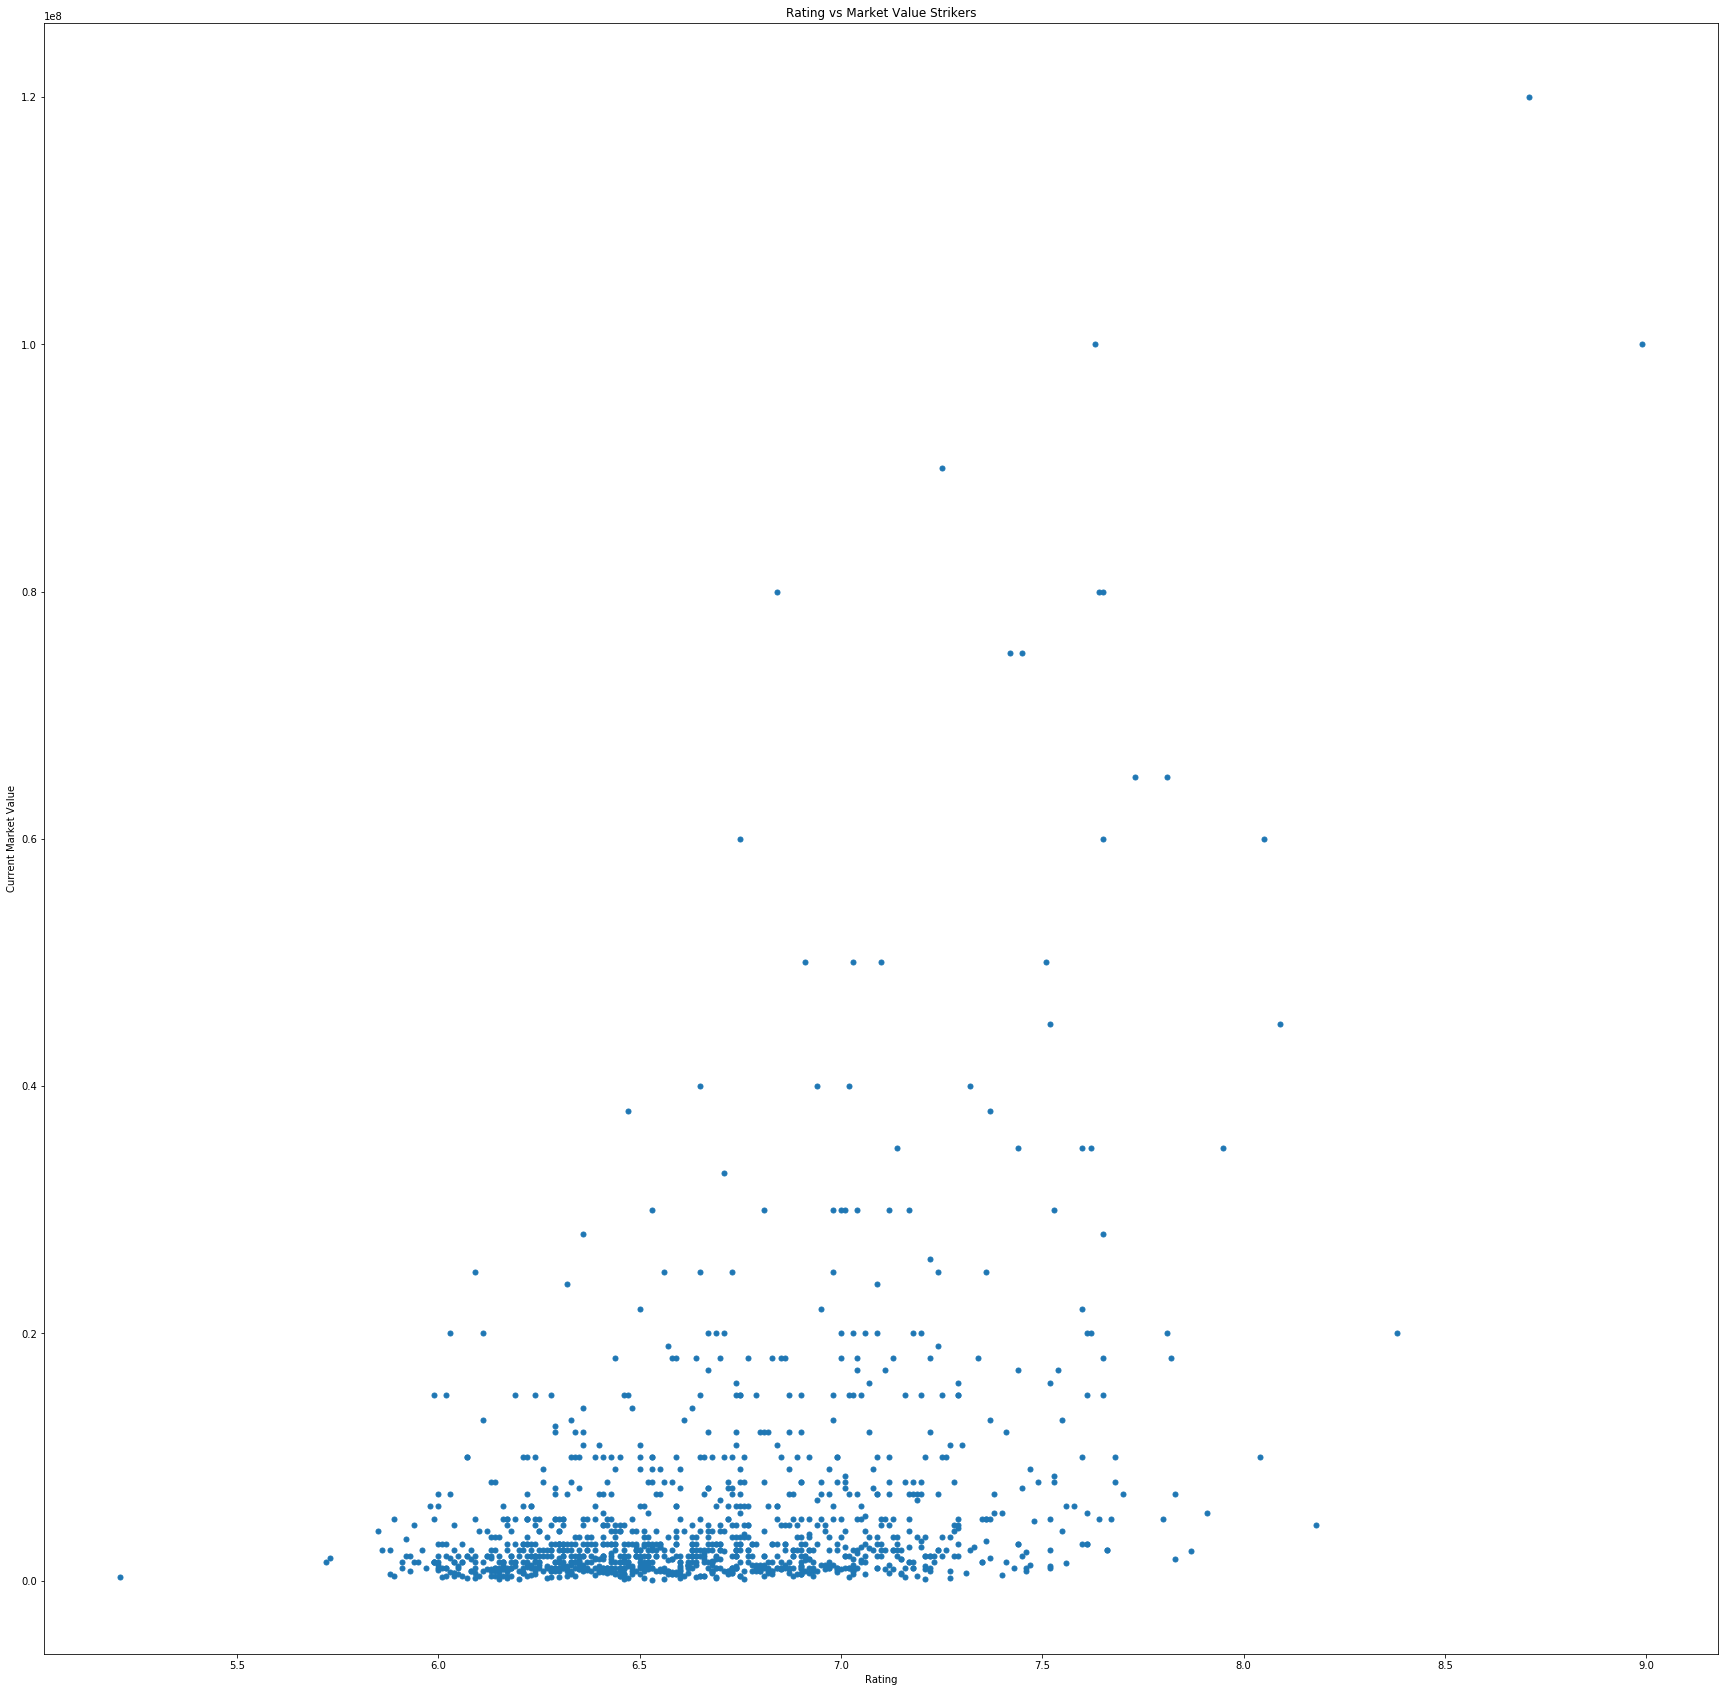

In [289]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_st, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value Strikers')
plt.show()

In [290]:
#need to create column with flag for w african born or not 

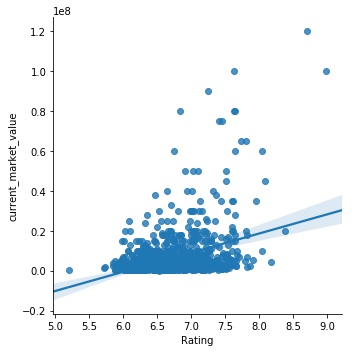

In [291]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_st)

In [292]:
df_st['Rating'].corr(df_st['current_market_value'])

0.39026485471834338

In [293]:
df_wa_st = df_st[df_st.country_of_birth.isin(wa_country_list)]

In [294]:
df_wa_st.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,50.000000,0.0,5.000000e+01,5.000000e+01,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.805200,NaN,5.148000e+06,6.814000e+06,0.91120,0.089800,0.390800,0.005200,1.646000,72.440000,...,0.532000,1.516000,0.720000,17.434000,0.160000,0.512000,0.038000,0.436000,0.142000,1.064000
std,0.059186,NaN,6.713753e+06,7.321105e+06,2.71452,0.121798,0.944777,0.023581,0.870423,8.550856,...,0.429257,0.817752,0.484873,8.480533,0.257935,0.498831,0.083029,0.333662,0.148585,0.651767
min,1.720000,NaN,4.000000e+05,1.000000e+06,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.760000,NaN,1.312500e+06,2.000000e+06,0.19000,0.000000,0.000000,0.000000,1.000000,67.300000,...,0.200000,1.000000,0.325000,10.525000,0.000000,0.100000,0.000000,0.200000,0.000000,0.700000
50%,1.800000,NaN,3.000000e+06,4.000000e+06,0.41000,0.000000,0.105000,0.000000,1.700000,74.750000,...,0.500000,1.400000,0.700000,17.050000,0.100000,0.400000,0.000000,0.400000,0.100000,1.000000
75%,1.847500,NaN,6.750000e+06,1.000000e+07,0.65250,0.145000,0.365000,0.000000,2.100000,78.250000,...,0.800000,2.075000,0.975000,22.600000,0.200000,0.800000,0.000000,0.600000,0.200000,1.400000
max,1.980000,NaN,4.000000e+07,4.000000e+07,19.29000,0.450000,6.430000,0.150000,3.900000,89.700000,...,2.000000,3.400000,2.200000,34.600000,1.500000,2.500000,0.300000,1.500000,0.500000,3.000000


In [295]:
df_wa_st['Rating'].corr(df_wa_st['current_market_value'])

0.12004419966857131

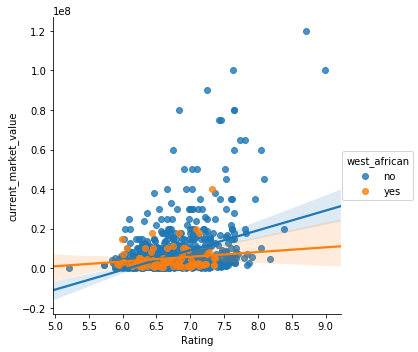

In [296]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_st)

In [297]:
#now I want to remove the outliers and look again 

In [302]:
df_adjusted = df[df['current_market_value'] <= 30000000]

In [303]:
df_adjusted.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,3928.000000,117.00000,3.936000e+03,3.936000e+03,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,...,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000
mean,1.816752,9.84188,4.026322e+06,6.209909e+06,0.390170,0.082678,0.333618,0.024980,0.879573,76.557342,...,0.145427,0.749060,0.652134,29.942480,0.308943,2.139202,0.032495,0.377134,0.056072,0.451016
std,0.066550,1.17196,5.240590e+06,7.195496e+06,5.061275,0.160103,2.332503,0.726508,0.820159,11.504433,...,0.261147,0.689905,0.610214,15.468335,0.477351,2.097421,0.078412,0.452805,0.106504,0.504404
min,1.600000,7.50000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.00000,1.000000e+06,1.800000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.000000,...,0.000000,0.200000,0.200000,18.200000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.820000,10.00000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.600000,...,0.000000,0.600000,0.500000,28.800000,0.100000,1.500000,0.000000,0.300000,0.000000,0.300000
75%,1.860000,10.50000,4.500000e+06,7.500000e+06,0.260000,0.120000,0.320000,0.000000,1.300000,83.800000,...,0.200000,1.100000,1.000000,40.300000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000
max,2.030000,13.00000,3.000000e+07,7.000000e+07,270.000000,2.900000,90.000000,45.000000,5.600000,100.000000,...,2.400000,5.100000,4.200000,101.100000,3.300000,14.000000,1.000000,3.700000,1.000000,3.900000


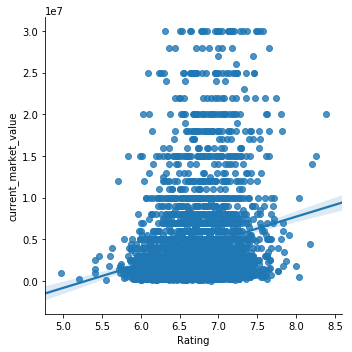

In [304]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_adjusted)

In [305]:
df_adjusted['Rating'].corr(df_adjusted['current_market_value'])

0.20629517539278464

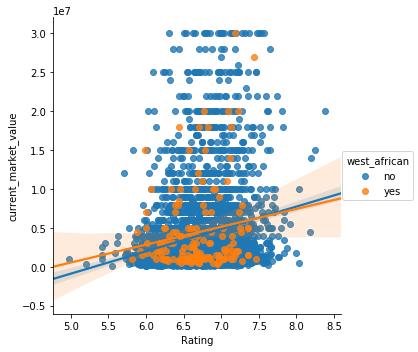

In [306]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_adjusted)

In [307]:
df_st_adj = df_adjusted[df_adjusted.Position.isin(striker)]

In [309]:
df_st_adj.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,1149.000000,34.000000,1.152000e+03,1.152000e+03,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,1.801784,9.676471,4.437652e+06,6.908455e+06,0.656293,0.128793,0.298542,0.013880,1.500000,73.620660,...,0.363628,1.201823,0.826562,18.103733,0.323264,0.619878,0.042795,0.514063,0.113021,0.877257
std,0.064742,1.134062,5.412332e+06,7.834466e+06,2.489718,0.203801,1.475735,0.183002,0.915045,9.959983,...,0.367259,0.753299,0.596010,10.226338,0.480168,0.772718,0.089113,0.487812,0.141988,0.609955
min,1.600000,7.500000,7.500000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,9.000000,1.000000e+06,2.000000e+06,0.080000,0.000000,0.000000,0.000000,0.900000,68.300000,...,0.100000,0.700000,0.400000,11.000000,0.000000,0.100000,0.000000,0.200000,0.000000,0.400000
50%,1.800000,9.500000,2.500000e+06,4.000000e+06,0.310000,0.060000,0.125000,0.000000,1.400000,74.700000,...,0.300000,1.100000,0.700000,16.800000,0.100000,0.400000,0.000000,0.400000,0.100000,0.800000
75%,1.850000,10.000000,5.000000e+06,9.000000e+06,0.572500,0.200000,0.290000,0.000000,2.000000,79.925000,...,0.500000,1.700000,1.100000,23.000000,0.400000,0.800000,0.100000,0.700000,0.200000,1.200000
max,2.030000,13.000000,3.000000e+07,6.500000e+07,45.000000,2.730000,45.000000,6.000000,5.600000,100.000000,...,2.400000,5.100000,3.900000,101.100000,3.100000,8.400000,1.000000,3.600000,1.000000,3.900000


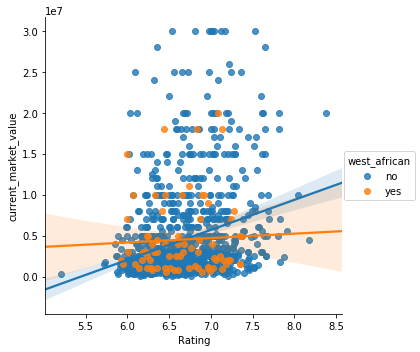

In [308]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_st_adj)

In [310]:
df_st_adj['Rating'].corr(df_st_adj['current_market_value'])

0.26823776938668709

In [311]:
df_wa_st_adj = df_st_adj[df_st_adj.country_of_birth.isin(wa_country_list)]

In [312]:
df_wa_st_adj.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,49.000000,0.0,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.806327,NaN,4.436735e+06,6.136735e+06,0.920612,0.082449,0.395714,0.002245,1.628571,72.289796,...,0.536735,1.520408,0.712245,17.208163,0.161224,0.512245,0.032653,0.438776,0.142857,1.042857
std,0.059256,NaN,4.493511e+06,5.594908e+06,2.741826,0.111290,0.953922,0.011043,0.870584,8.572564,...,0.432384,0.825626,0.486755,8.415136,0.260461,0.503998,0.074688,0.336536,0.150000,0.640963
min,1.720000,NaN,4.000000e+05,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.760000,NaN,1.250000e+06,2.000000e+06,0.190000,0.000000,0.000000,0.000000,1.000000,67.300000,...,0.200000,1.000000,0.300000,10.400000,0.000000,0.100000,0.000000,0.200000,0.000000,0.700000
50%,1.800000,NaN,3.000000e+06,4.000000e+06,0.410000,0.000000,0.100000,0.000000,1.700000,74.700000,...,0.500000,1.400000,0.700000,17.000000,0.100000,0.400000,0.000000,0.400000,0.100000,1.000000
75%,1.850000,NaN,6.000000e+06,1.000000e+07,0.660000,0.130000,0.370000,0.000000,2.100000,77.800000,...,0.800000,2.100000,0.900000,22.000000,0.200000,0.800000,0.000000,0.600000,0.200000,1.400000
max,1.980000,NaN,2.000000e+07,2.200000e+07,19.290000,0.340000,6.430000,0.060000,3.900000,89.700000,...,2.000000,3.400000,2.200000,34.600000,1.500000,2.500000,0.300000,1.500000,0.500000,3.000000


In [313]:
df_wa_st_adj['Rating'].corr(df_wa_st_adj['current_market_value'])

-0.040569987360928136

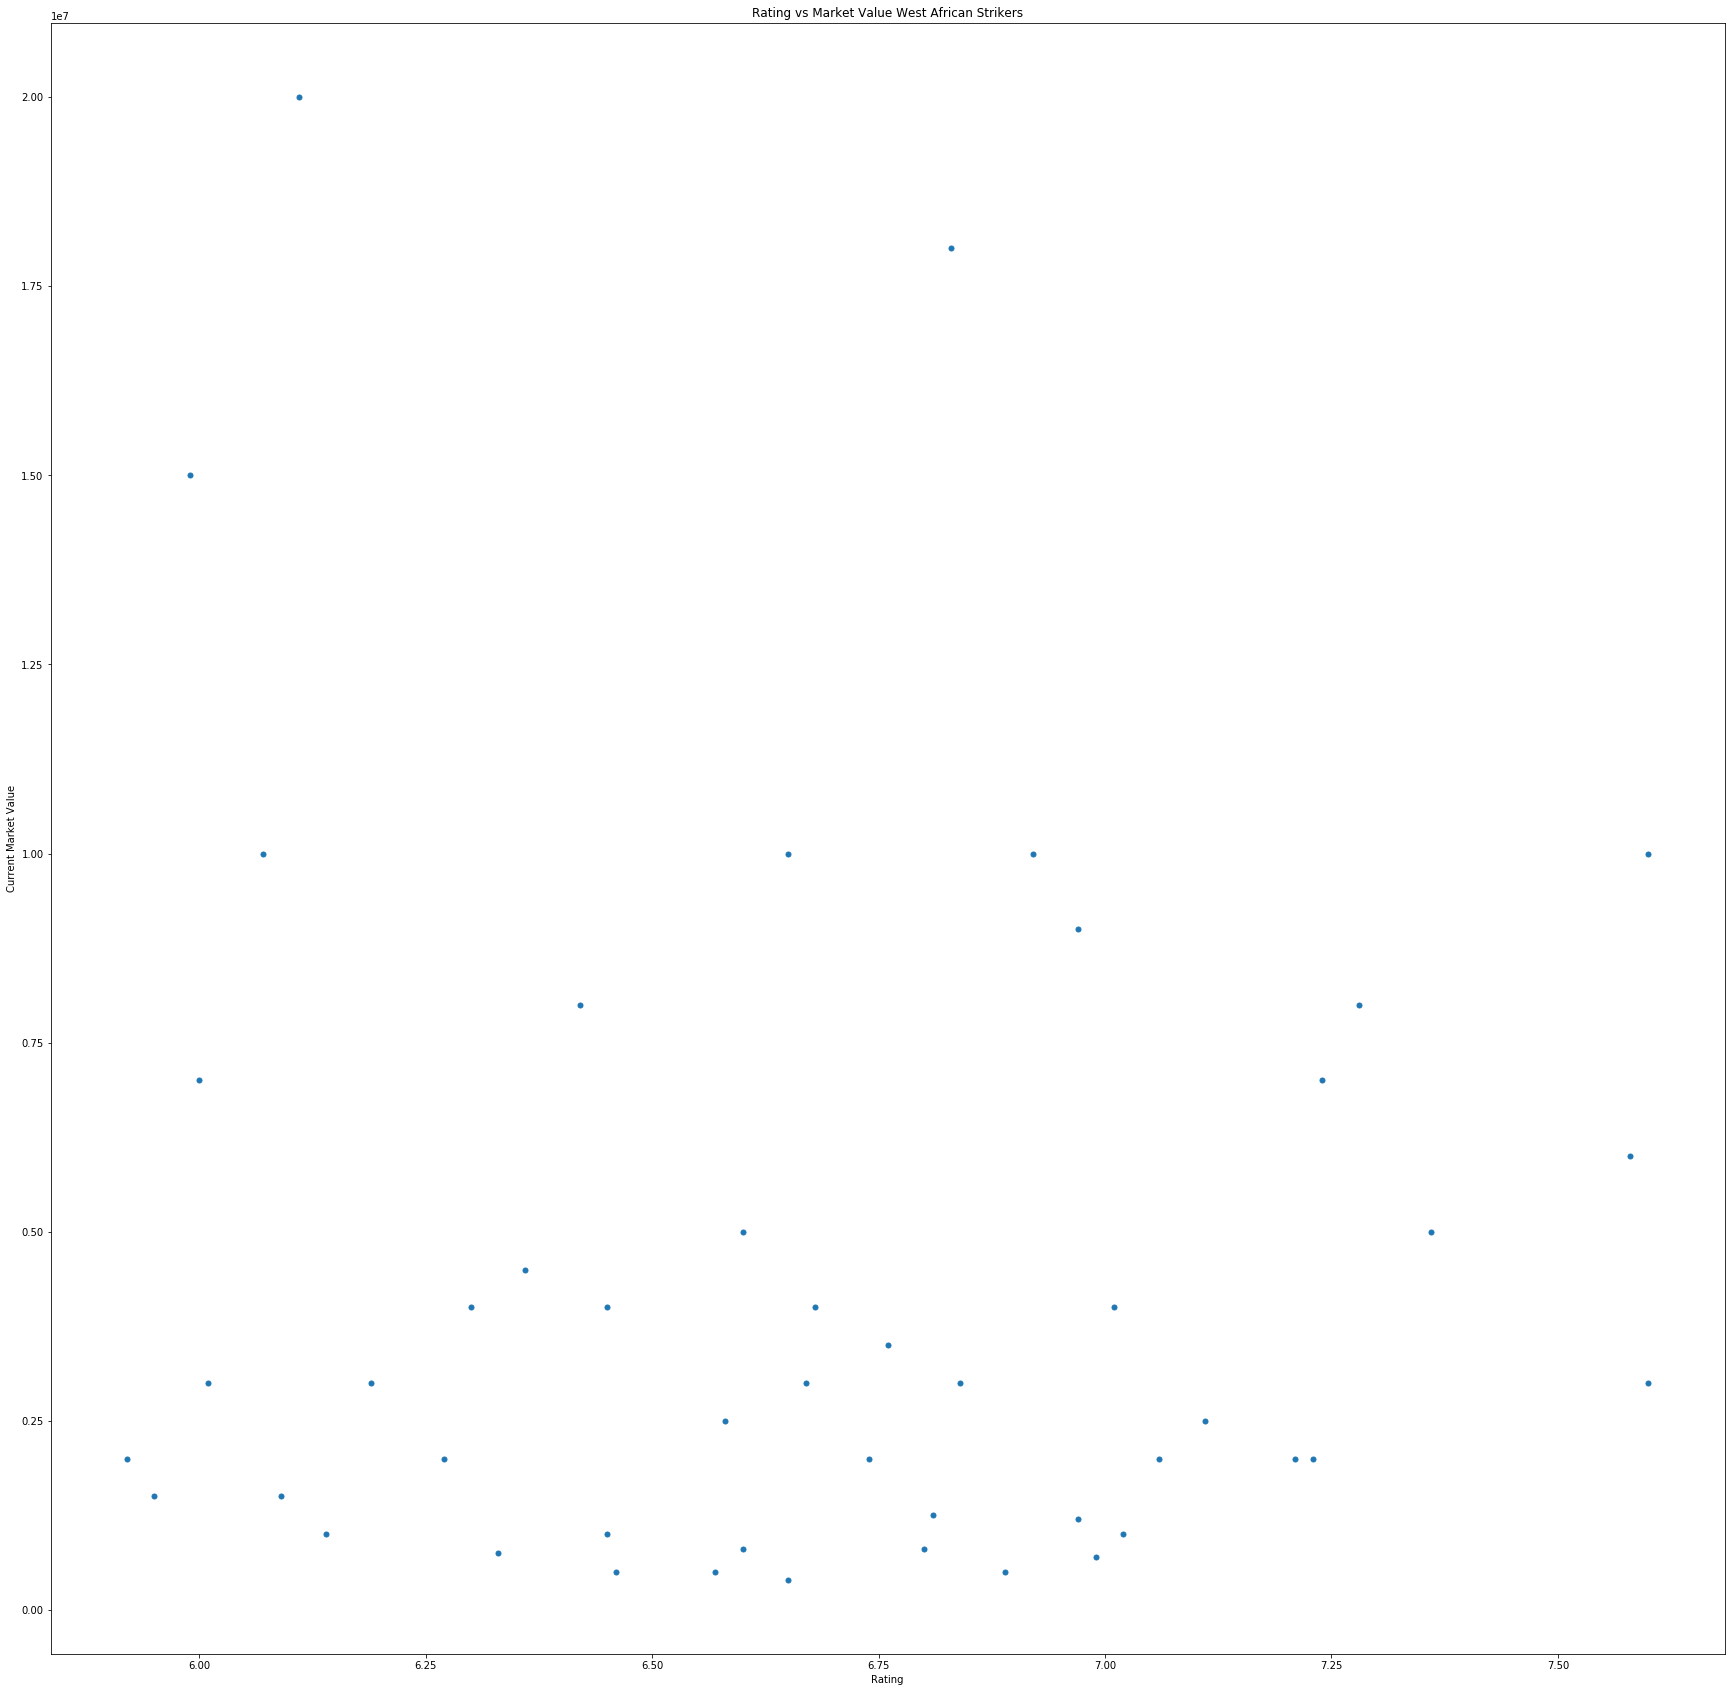

In [314]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_wa_st_adj, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value West African Strikers')
plt.show()